# <center> Практические задания по цифровой обработке сигналов </center>
# <center> Первая лабораторная работа </center>


В данной работе Вы познакомитесь с основными методами работы с аудиоданными в Python. Разбересь в том, как работает свертка, и примените пару интересных фильтров.

# Задание 1. Работа с аудиофайлами в Python (1 балл)

## Теория

Звук - это аналоговый сигнал. То есть он является непрерывным по времени и по значениям. Для того, чтобы работать со звуком на цифровом устройстве, надо преобразовать его в цифровое представление. Для этого надо разделить непрерывный сигнал на промежутки времени (дискретизация сигнала) и разбить непрерывные значения на интервалы (квантование сигнала). Выбраные параметры дискретизации и квантования сигнала напрямую влияют на качество цифрового сигнала. 

<!-- 
## Практика

1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла? 

2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?   

3. Чем .wav отличается от других кодеков, например .mp3 или .ogg? -->


<!-- ### Подсказка

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib. -->

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Audio
from scipy.io import wavfile
import scipy
import scipy.signal
from IPython.display import display
%matplotlib inline

### 1. Что хранится в .wav файле? Как узнать параметры дискретизации и квантования .wav файла?

Файл .wav состот из заголовка и основной области данных. В заголовке файла хранится информация о размере файла, количестве каналов, частоте дискретизации и количестве бит в сэмпле.

Частоту дискретизации и квантования можно посмотреть в свойствах звукового файла.



### 2. Запишите аудиофайл со своим голосом. Загрузите его. Попробуйте поменять ему частоту дискретизации. Нарисуйте форму волны считанного файла. Воспроизведите полученные сигналы. При какой частоте дискретизации становится невозможно разобрать человеческую речь?

**Подсказка**

Записать цифровой сигнал можно при помощи, например, [Audacity](https://www.audacityteam.org) или [Adobe Audition](https://www.adobe.com/ru/products/audition.html). Для считывания файлов воспользуйтесь библиотекой [scipy](https://www.scipy.org) или [librosa](https://librosa.org/doc/latest/index.html). Для воспроизведения аудиофайла удобно использовать класс Audio из модуля IPython.display, а для отрисовки - matplotlib.

In [2]:
# считываем .wav файл
samplerate, data = wavfile.read('resources/test_lab1.wav')
print(f"частота дискретизации = {samplerate} Гц")
print(f"число каналов = {data.shape[1]}")
print(f"длина записи = {round(data.shape[0] / samplerate,3)} с")
print(data.shape)
print(data)

частота дискретизации = 44100 Гц
число каналов = 2
длина записи = 7.022 с
(309659, 2)
[[-5 -6]
 [-3 -1]
 [-3 -4]
 ...
 [ 5  3]
 [-8 -7]
 [-1 -1]]


In [3]:
# функция для отрисовки
def audio2_plot(data):
    time = np.linspace(0., data.shape[0] / samplerate, data.shape[0])
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(16, 6))
    ax1.set_title('Left channel')
    ax1.plot(time, data[:, 0], 'C0')
    ax2.set_title('Right chanel')
    ax2.plot(time, data[:, 1], 'C1')
    for ax in (ax1, ax2):
        ax.set_xlabel("Time [s]")
        ax.set_ylabel("Amplitude")

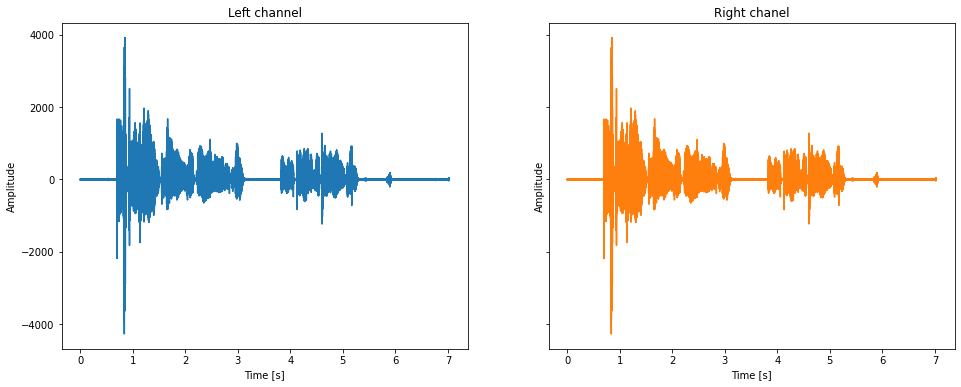

In [4]:
audio2_plot(data)

In [5]:
# воспроизведение 
display(Audio([data[:, 0], data[:, 1]], rate=samplerate)) # исходная частота
display(Audio([data[:, 0], data[:, 1]], rate=22000)) # уменьшили в два раза
display(Audio([data[:, 0], data[:, 1]], rate=10000)) # примерно тут речь становится сложно разобрать

### 3. Чем .wav отличается от других кодеков, например .mp3 или .ogg?

Файл формата .wav, в отличие от mp3 или .ogg, содержит звук в несжатом виде, в следствие чего является более детализированым и имеет больший вес. 

# Задание 2. Гармонические сигналы (1 балл)

## Теория
[Гармонические колебания](https://ru.wikipedia.org/wiki/Гармонические_колебания) -  колебания, при которых физическая величина изменяется с течением времени по гармоническому (синусоидальному/косинусоидальному) закону. 

В общем случае гармонические колебания задаются формулой:

$$y=A \cos(\omega t+\varphi_0)$$

где $А$ - это амплитуда, $\omega$ – циклическая частота (радиан/с), $\varphi$ - фаза (сдвиг), $t$ – время. 


In [6]:
# Сначала определим функцию для отрисовки сигнала с хорошим масштабом и сеткой
# Это поможет легче анализировать сигнал
def draw_signal(data, figsize=(14, 14)):
    plt.figure(figsize=figsize)
    plt.plot(data, linewidth=2)
    plt.minorticks_on()
    plt.xticks(np.arange(0, 1000, step=100))
    plt.yticks(np.arange((data.min().round())//10*10,
                         (data.max().round())//10*10+10, step=5))
    plt.grid(which='major',
             color='k',
             linewidth=1)
    plt.grid(which='minor',
             color='k',
             linestyle=':')
    plt.show()

In [7]:
# Читаем данные с подготовленными сигналами
import pickle
with open("resources/data.pickle", "rb") as f:
    test_data = pickle.load(f)
# Теперь можно приступать к практике!

## Практика

Постройте графики трех сигналов a, b и c из test_data['task2']. Попробуйте подобрать коэффициенты для этих сигналов. Сгенерируйте сигналы (1000 отсчетов) с подобранными коэффициентами. Постройте графики сгенерированных сигналов и пройдите тест на схожесть с оригинальным.


Подсказка. Фаза, период и амплитуда сигнала - целочисленные. Для генерации пользуйтесь библиотекой numpy и функциями arange, sin, cos.

### Сигнал ***a***

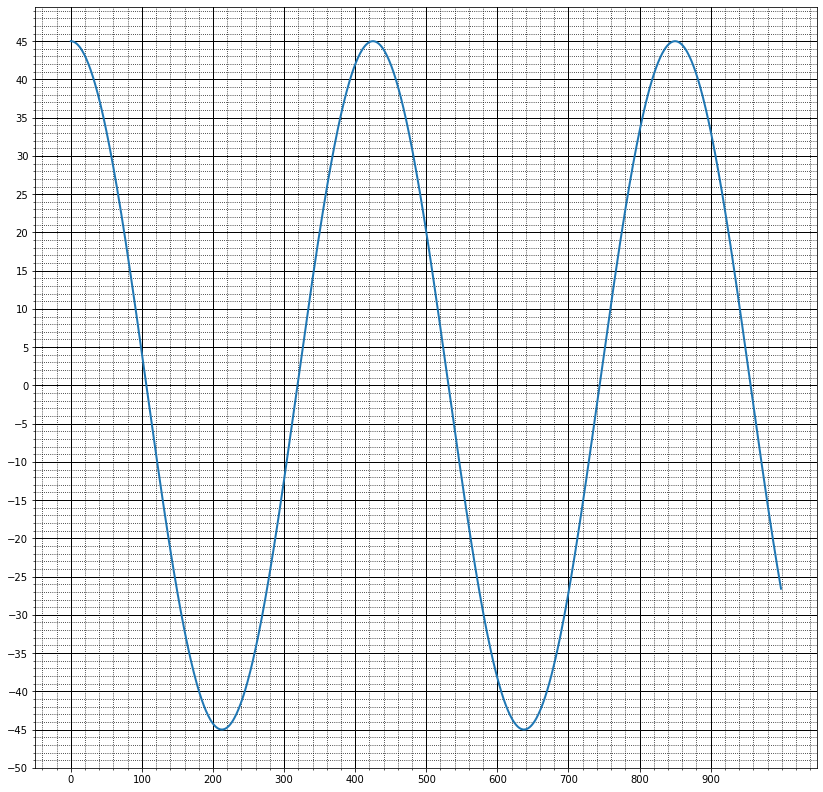

In [8]:
draw_signal(test_data['task2']['a'])

In [9]:
# YOUR CODE HERE
t = np.arange(1000)
A = 45
T = 425
w = 2*np.pi*(1/T)
phi = 0
a = A*np.cos(w*t + phi)
print(A, w, phi)

45 0.014783965428657848 0


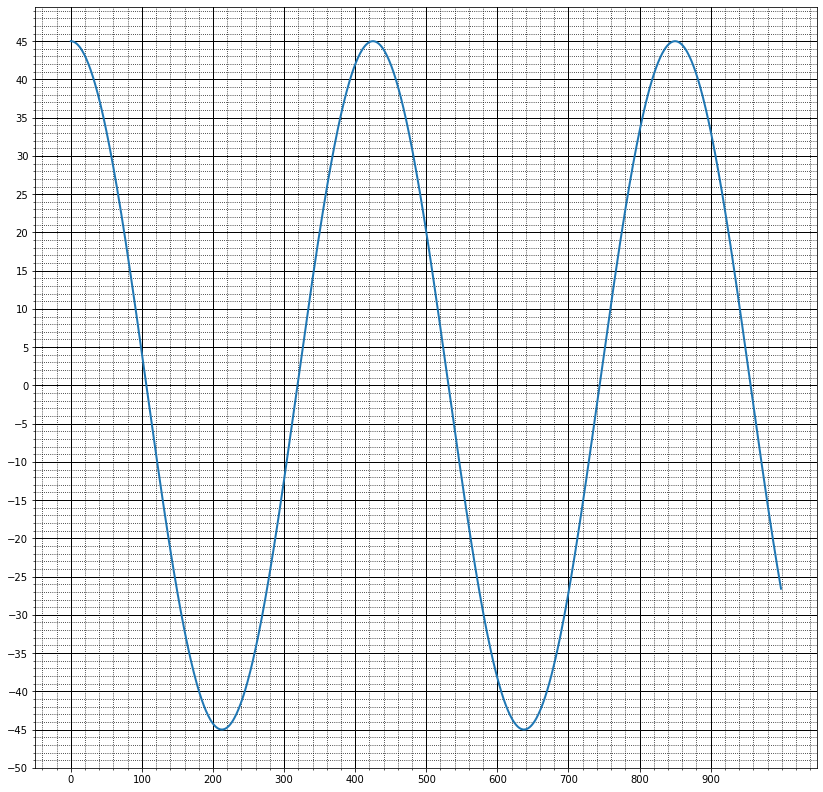

In [10]:
draw_signal(a)

In [11]:
assert len(a) == 1000
assert np.allclose(a, test_data["task2"]["a"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'a':**

1. Амплитуда - $A= 45$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.0148 $

3. Фаза - $\phi= 0$

### Сигнал ***b***

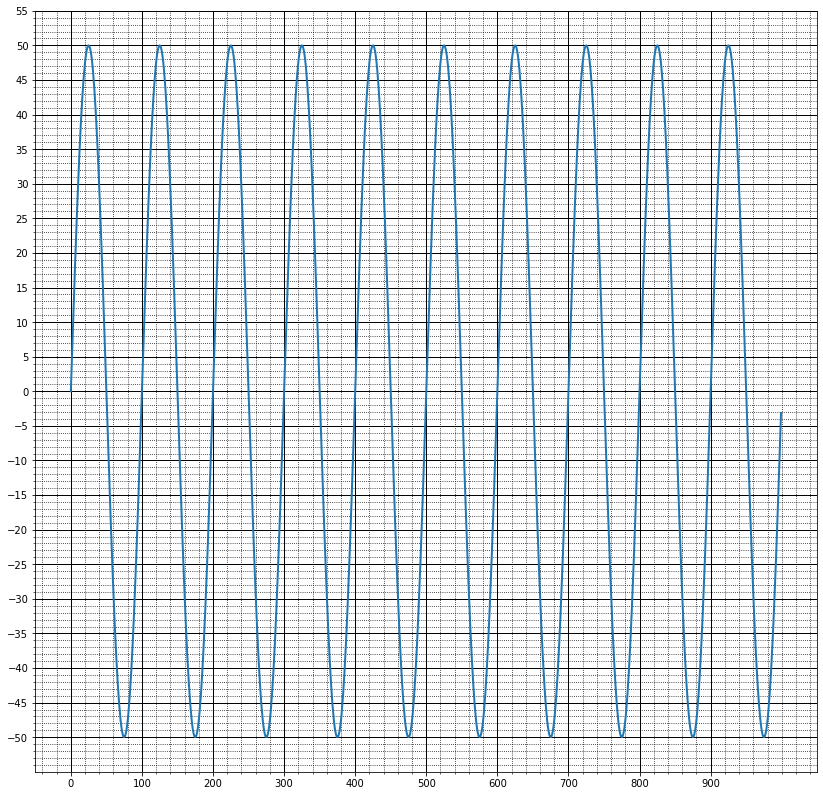

In [12]:
draw_signal(test_data['task2']['b'])

In [13]:
# YOUR CODE HERE
t = np.arange(1000)
A = 50
T = 100
w = 2*np.pi*(1/T)
phi = - np.pi/2
b = A*np.cos(w*t + phi)
print(A, w, phi)

50 0.06283185307179587 -1.5707963267948966


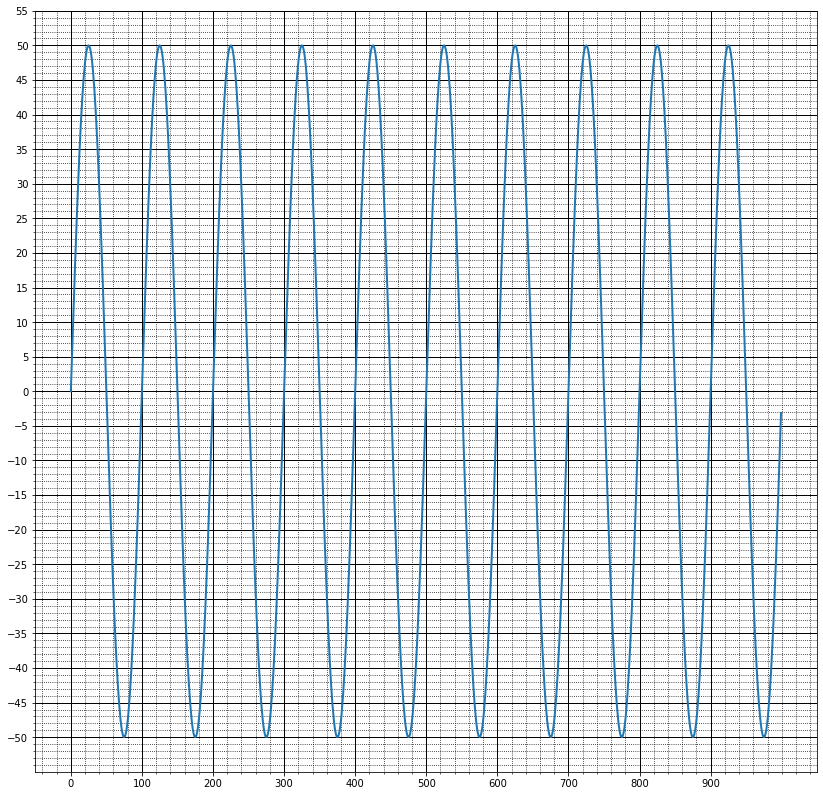

In [14]:
draw_signal(b)

In [15]:
assert len(b) == 1000
assert np.allclose(b, test_data["task2"]["b"], atol=1)
print("Ok!")

Ok!


**Подобранные коэффициенты для сигнала 'b':**

1. Амплитуда - $A= 50$

2. Угловая частота ($ \displaystyle\omega =\frac{2\pi}{T}) = 0.063$

3. Фаза - $\phi= -\frac{\pi}{2}$

### Сигнал ***c***

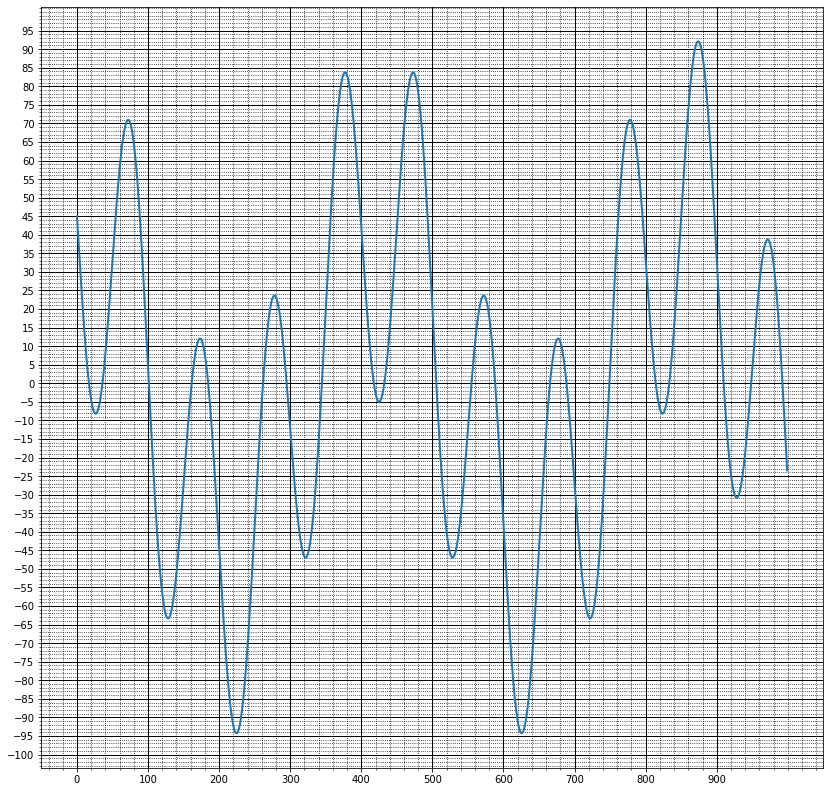

In [16]:
draw_signal(test_data['task2']['c'])

In [17]:
# сигнал состоит из двух гармоник
# YOUR CODE HERE
t = np.arange(1000)
A1 = 45
T1 = 425
w1 = 2*np.pi*(1/T1)
phi1 = 0
A2 = -50
T2 = 100
w2 = 2*np.pi*(1/T2)
phi2 = - np.pi/2
c = A1*np.cos(w1*t + phi1) + A2*np.cos(w2*t + phi2)

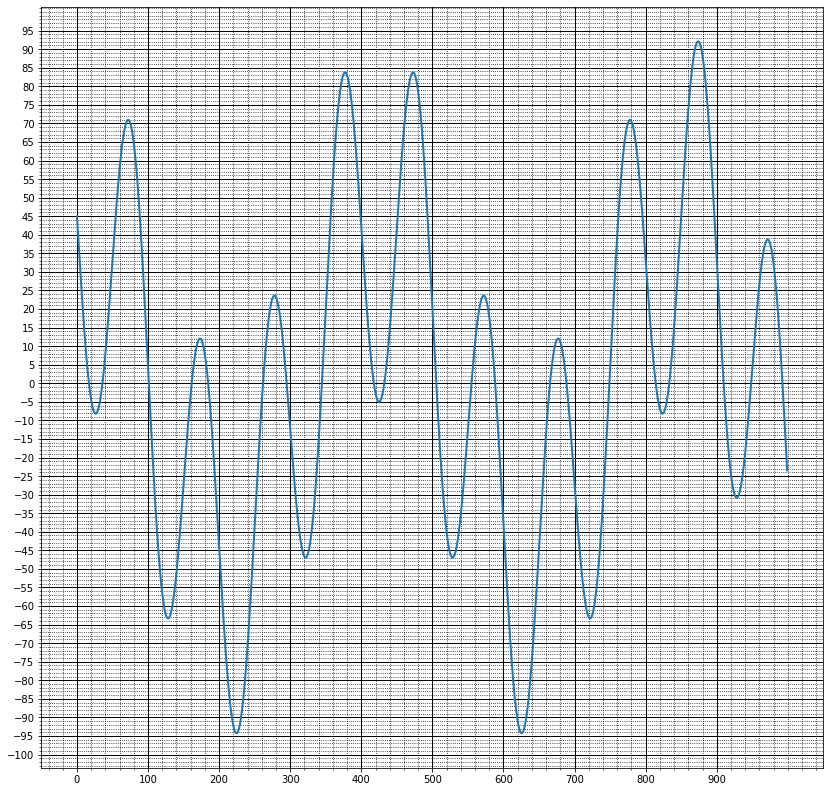

In [18]:
draw_signal(c)

In [19]:
assert len(c) == 1000
assert np.allclose(c, test_data["task2"]["c"], atol=1)
print("Ok!")

Ok!


# Задание 3. Свертка (3 балла)

## Теория
Одна из наиболее частых операций, которая выполняется при обработке сигналов, это свёртка. Свёртка имеет много различных применений, например, с ее помощью можно убрать из сигнала шумы или применить к сигналу эффект эхо.


Свёртка — это математическая операция, применённая к двум функциям f и g и порождающая третью функцию. Операцию свёртки можно интерпретировать как «схожесть» одной функции с отражённой и сдвинутой копией другой.  Другими словами, преобразование свёртки однозначно определяет выходной сигнал y(t) для установленного значения входного сигнала x(t) при известном значении функции импульсного отклика системы h(t).

<!-- ![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution") -->
![Convolution](resources/Convolution_of_box_signal_with_itself2.gif "Convolution")

Формула свёртки:
$$y_t=\frac{1}{2} \int_0^T x(\tau)h(t-τ)dτ$$
где $\tau$  - длительность импульсной переходной характеристики.

## Практика
Реализуйте операцию свёртки. Сравните её с существующей реализацией scipy.signal.convolve. Постройте графики фильтра, исходного сигнала и результата свертки.

In [20]:
def convolve(in1, in2):
    N = len(in1)
    M = len(in2)
    conv = []
    for n in range(N+M-1):
        el = 0
        for m in range(n+1):
            if m < N and (n-m) < M:
                el += in1[m]*in2[n-m]
        conv.append(el)
    return np.array(conv)

In [21]:
def test_convolve(a, b, print_debug=False):
    my_result = convolve(a, b)
    scipy_result = scipy.signal.convolve(a, b, method='direct')
    if print_debug:
        print(f"Your result {my_result}")
        print(f"Scipy result {scipy_result}")
    assert np.allclose(my_result, scipy_result), f"Test {a} conv {b} failed"
    print("Ok!")

In [22]:
a = np.repeat([0, 1, 0], 10)
b = np.array([0, 1, 2, 3, 2, 1, 0])

In [23]:
test_convolve(a, b, print_debug=False)

Ok!


### Нарисуйте результат свертки a и b

Сигнал **а**

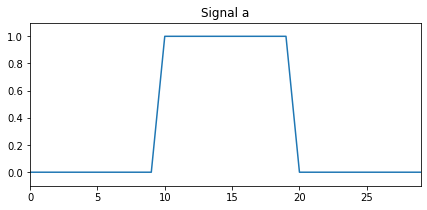

In [24]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(a)
ax.set_title('Signal a')
ax.margins(0, 0.1)
fig.show()

Сигнал **b**

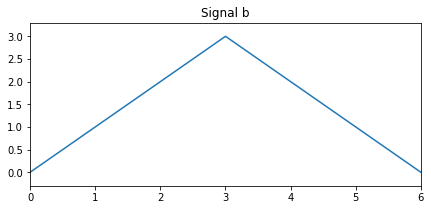

In [25]:
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(b)
ax.set_title('Signal b')
ax.margins(0, 0.1)
fig.show()

Свертка **a** и **b**

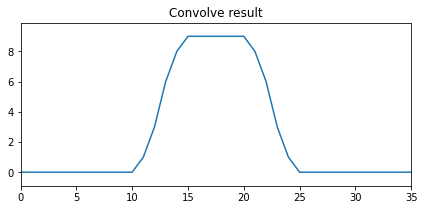

In [26]:
my_result = convolve(a, b)
fig, ax = plt.subplots(figsize=(7, 3))
ax.plot(convolve(a, b))
ax.set_title('Convolve result')
ax.margins(0, 0.1)
fig.show()

Все 3 графика на одной картинке:

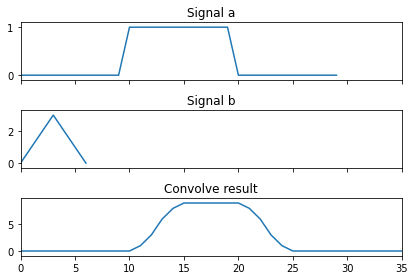

In [27]:
fig, (ax_orig, ax_win, ax_filt) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(a)
ax_orig.set_title('Signal a')
ax_orig.margins(0, 0.1)
ax_win.plot(b)
ax_win.set_title('Signal b')
ax_win.margins(0, 0.1)
ax_filt.plot(my_result)
ax_filt.set_title('Convolve result')
ax_filt.margins(0, 0.1)
fig.tight_layout()
fig.show()

# Задание 4. * Алгоритм Карплуса-Стронга 

Реализуйте  [Алгоритм Карплуса-Стронга](https://en.wikipedia.org/wiki/Karplus%E2%80%93Strong_string_synthesis). В качестве фильтра используйте усреднитель двух смежных отсчетов. Проверьте результат. 

Отрисуйте и воспроизведите полученный сигнал. На что влияют параметры генерации? Попробуйте имитировать звучание разных струн гитары.

In [28]:
# в функцию добавлен коэффицент затухания a (по умолчанию a = 1)
def karplus_strong(noise, N, a=1):
    # Noise - input
    # N - number of samples to generate
    # a - damping factor (from lectures)
    # return y - generated signal based on Noise
    # YOUR CODE HERE
    #
    L = len(noise)
    y = np.append(noise, np.zeros(int(N - L)))
    for i in range(L, len(y)):
        y[i] = a*(y[i-L]+y[i-L-1])/2
    return y

In [29]:
np.random.seed(seed=1)
sample_rate = 44100
frequency = 82.41
sec = 2
gen_len = sample_rate * sec
noise = (2 * np.random.uniform(-1, 1, int(sample_rate/frequency)))  # [-1, 1]

gen_wav = karplus_strong(noise, gen_len)
assert np.allclose(gen_wav[:len(noise)],
                   noise), "Generated signal must starting with noise"
assert np.allclose(gen_wav[len(noise)], (noise[0]) /
                   2), "Out of range samples eq 0."
assert np.allclose(gen_wav[len(noise)+1: 2*len(noise)], (noise[:-1] + noise[1:])/2), \
    "Bad requrent rule( 1 iteration)"
assert np.allclose(gen_wav[2*len(noise)], (noise[0]/2 + noise[-1])/2), \
    "Bad requrent rule( 2 iteration)"
assert np.allclose(gen_wav[2*len(noise)+2: 3*len(noise)],
                   (((noise[:-1] + noise[1:])/2)[:-1] + ((noise[:-1] + noise[1:])/2)[1:])/2), \
    "Bad requrent rule( 3 iteration)"
print('All Ok!')

All Ok!


### Попробуем покрутить параметры генерации

Сгенерируем гитарные ноты:

In [30]:
np.random.seed(seed=1)
sample_rate = 44100
freq = {'e': 329.63, 'B': 246.94, 'G': 196.00,
        'D': 146.83, 'A': 110.00, 'E': 82.41}
notes = dict.fromkeys(['e', 'B', 'G', 'D', 'A', 'E'], [])
sec = 2
gen_len = sample_rate * sec
for i in freq:
    noise = (2 * np.random.uniform(-1, 1, int(sample_rate/freq[i])))  # [-1, 1]
    notes[i] = karplus_strong(noise, gen_len, a=0.996)
    print(f'Нота {i}')
    display(Audio(notes[i], rate=sample_rate))

Нота e


Нота B


Нота G


Нота D


Нота A


Нота E


Визуализируем затухание амплитуды:

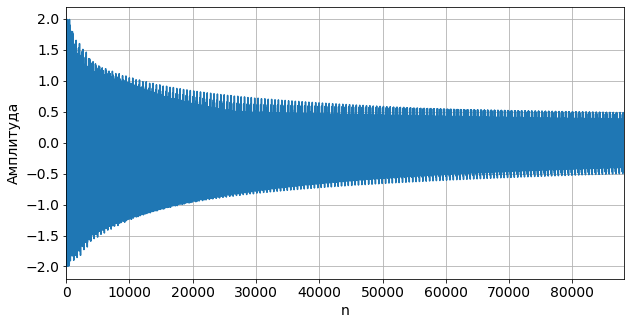

In [31]:
plt.figure(figsize=(10, 5))
plt.xlabel('n', fontsize=14)
plt.ylabel('Амплитуда', fontsize=14)
plt.xlim(0, gen_len)
plt.plot(np.linspace(0, gen_len+1, gen_len), gen_wav)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.grid()

Визуализируйте затухание амплитуд гитарных нот:

In [32]:
def plot_amplitude(signal, name=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    plt.xlabel('n', fontsize=14)
    plt.ylabel('Амплитуда', fontsize=14)
    plt.xlim(0, len(signal))
    plt.plot(np.linspace(0, len(signal)+1, len(signal)), signal)
    plt.tick_params(axis='both', which='major', labelsize=14)
    if name is not None:
        plt.legend([name])
    plt.grid()

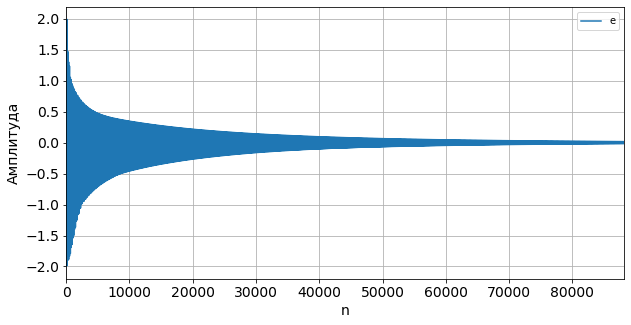

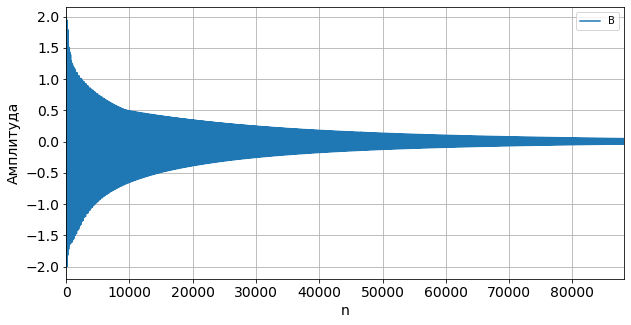

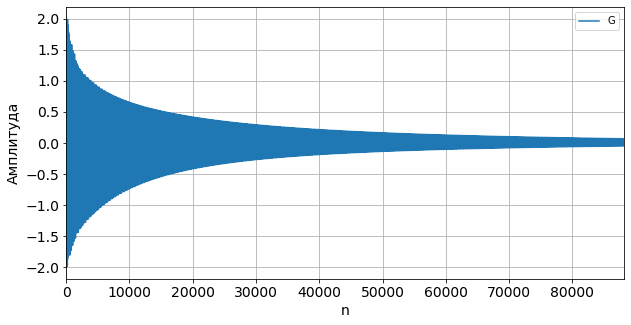

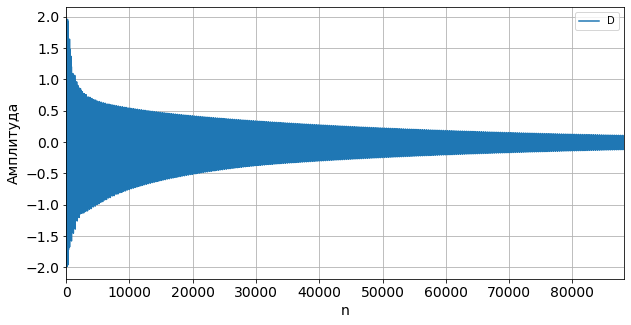

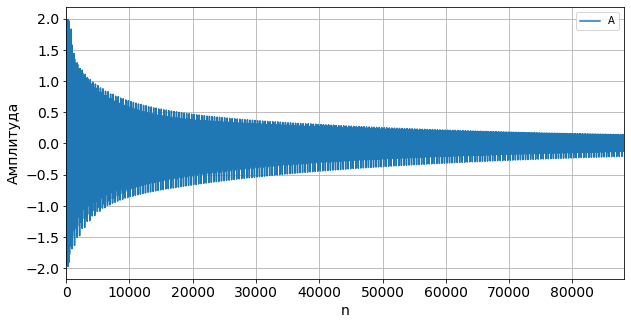

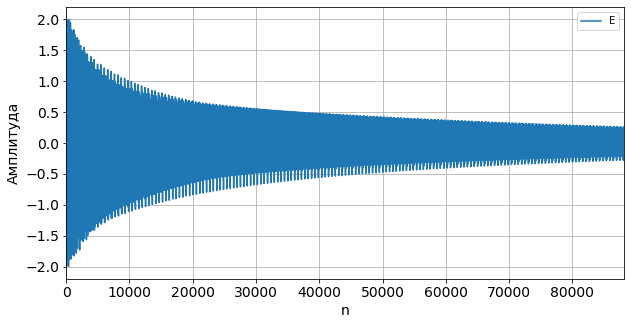

In [33]:
# a = 0.996
for i in notes:
    plot_amplitude(notes[i], name=i)

*Попытка сгенерировать аккорд

In [34]:
def make_chord(*notes):
    # notes - list of frequencies of notes included in the chord
    sample_rate = 44100
    sec = 2
    gen_len = sample_rate * sec
    noise = (2 * np.random.uniform(-1, 1,
             int(sample_rate/notes[0])))  # [-1, 1]
    chord = karplus_strong(noise, gen_len)
    for i in notes[1:]:
        noise = (2 * np.random.uniform(-1, 1, int(sample_rate/i)))
        chord = chord + karplus_strong(noise, gen_len, a=0.996)
    return chord

In [35]:
chord = make_chord(220, 138.59, 164.82)
display(Audio(chord, rate=sample_rate))